# DAT203 Final Project
*Ecommerce Customer Churn Analysis and Prediction*

https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

In [2]:
df = pd.read_csv("data/ecommerce_churn.csv")

## Overview

In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [6]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [8]:
df.describe(include="O").T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [9]:
df.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
for c in df.columns:
    if df[c].dtypes == 'object':
        print("---------------------------------")
        print(c)
        print()
        print(df[c].value_counts())
        print()
        print()

---------------------------------
PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


---------------------------------
PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


---------------------------------
Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


---------------------------------
PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


---------------------------------
MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [12]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [13]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [14]:
df['Complain'].value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

### Section Summary

- CustomerID can be dropped
- A few columns should be converted from numeric to categorical (Churn, CityTier, Complain)
- Several fields have missing values (dealt with in the next section)
- Replace missing values with the median appears to be sufficient
- Outliers? 

In [15]:
df.drop(['CustomerID'],axis=1, inplace=True)

## Visualizations

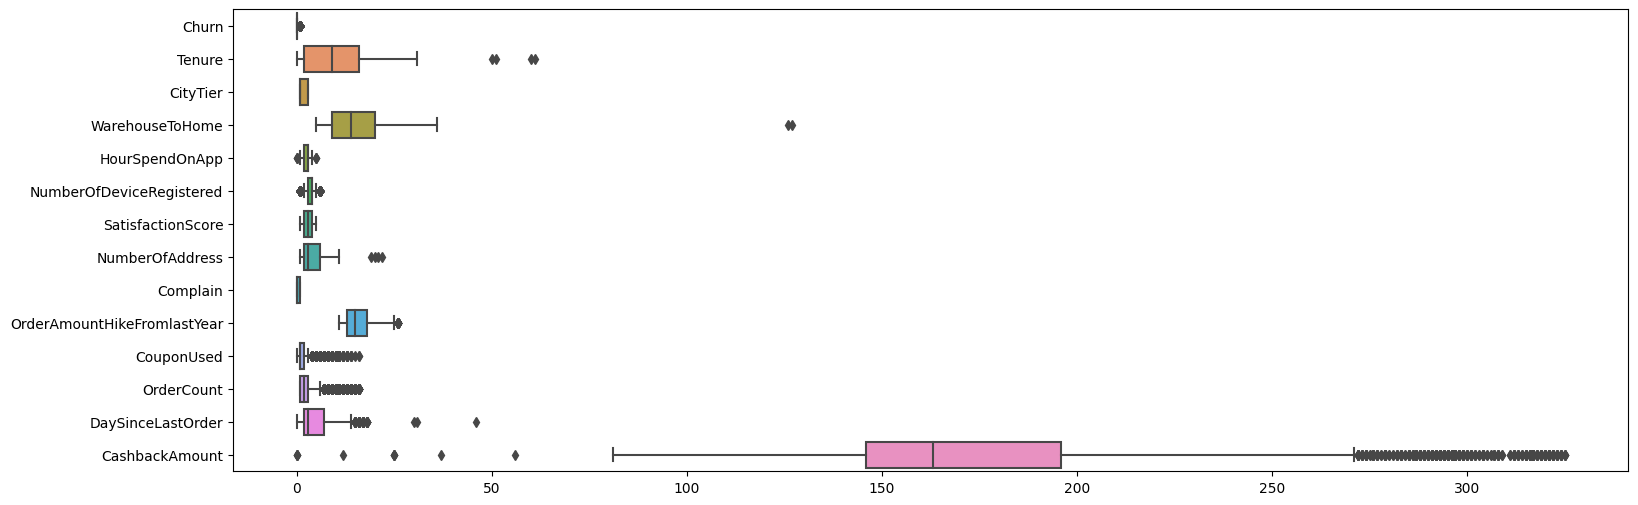

In [16]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df, orient="h")
plt.show()

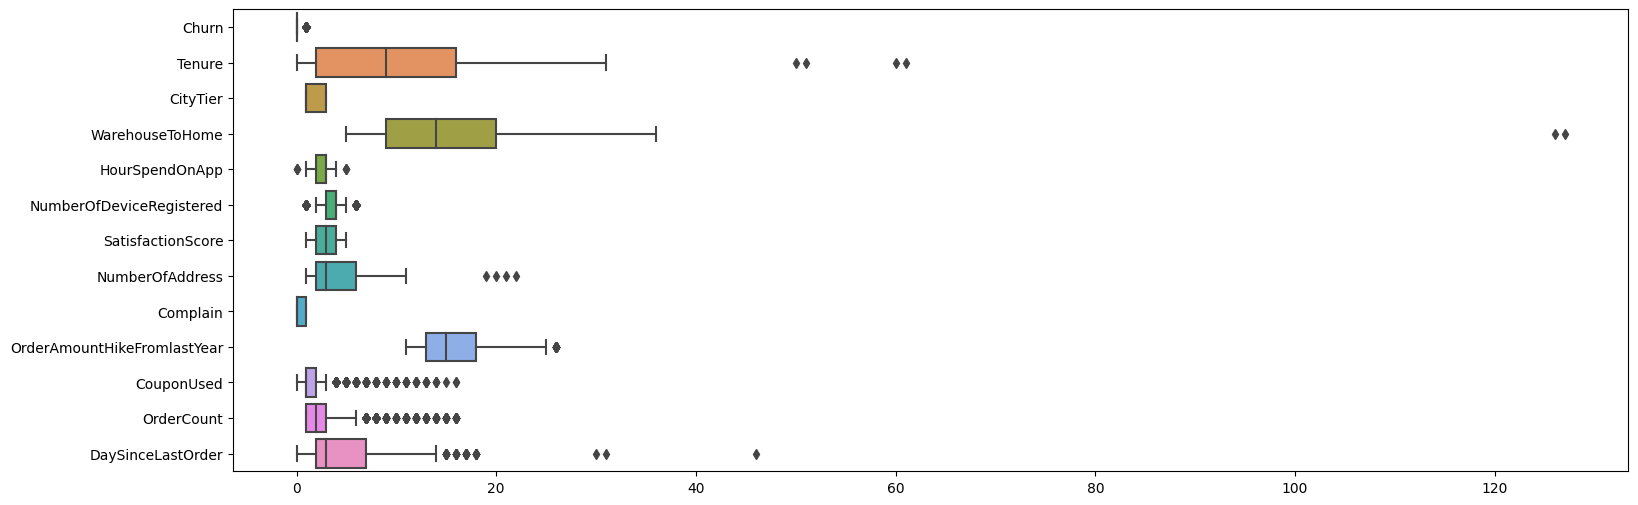

In [17]:
# remove CashbackAmount so we can see the other variables better
plt.figure(figsize=(18,6))
sns.boxplot(data=df.drop("CashbackAmount", axis=1), orient="h")
plt.show()

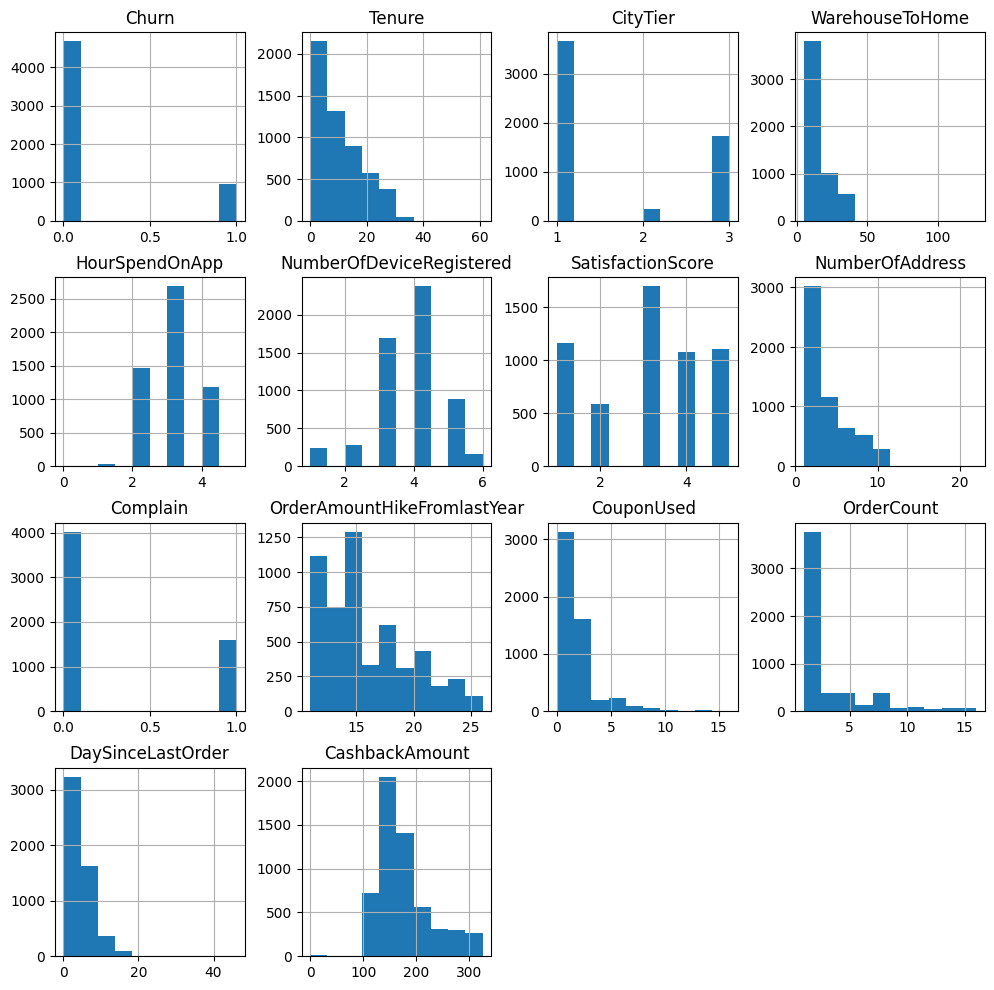

In [18]:
df.hist(figsize=(12, 12))
plt.show()

## Data Preparation

In [19]:
#df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')
df['Complain'] = df['Complain'].astype('object')

### Missing Values

In [20]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [21]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [22]:
df.isnull().sum().sort_values(ascending=False)

Churn                          0
SatisfactionScore              0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
PreferedOrderCat               0
Tenure                         0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
CashbackAmount                 0
dtype: int64

### Outliers

In [23]:
def outlier_boundry(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr = Q1-(1.5 * IQR)
    ur = Q3+(1.5 * IQR)
    return lr, ur

In [24]:
ignore = [ "Churn" ]
for c in df.columns:
    if c not in ignore and df[c].dtype != 'object': 
        lr, ur = outlier_boundry(df[c])
        df[c] = np.where(df[c] > ur, ur, df[c])
        df[c] = np.where(df[c] < lr, lr, df[c])

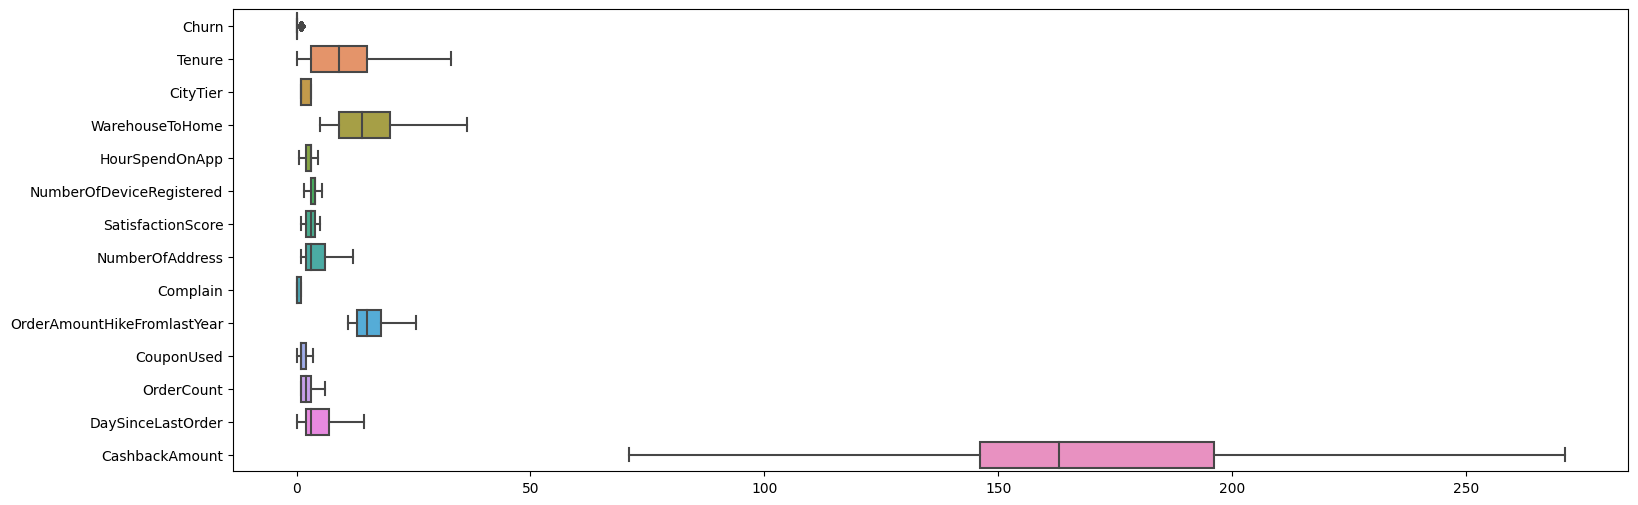

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df, orient="h")
plt.show()

## Comparison to Churn

In [26]:
# calulate the overall churn percentage 
v = df.Churn.value_counts()
churn_rate = v[1] / v[0] * 100
print(f"Overall churn rate: {churn_rate.round(2)}%")

Overall churn rate: 20.25%


In [27]:
def churn_plot(var, data):
    
    # build a dataframe with the grouped data we need
    d = pd.DataFrame({
        "Churned": data.groupby(var).Churn.sum(),
        "Total": data[var].value_counts(),
        "Pct": data.groupby(var).Churn.sum()*100 / data[var].value_counts()
    })
    
    # create the plot
    fig, ax = plt.subplots(figsize=(6,3))

    part1 = ax.bar(d.index, d['Total'], color='lightgrey', label='Total count')
    part2 = ax.bar(d.index, d['Churned'], color='tab:blue', label='Churned count')
    ax.set_xlabel(var)
    ax.set_ylabel('No. of customers')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    ax2 = ax.twinx()
    ax2.set_ylim(0, d['Pct'].max()+5)
    part3 = ax2.plot(d.index, d['Pct'], color='tab:orange', linewidth=2, label='Churn percentage')
    part4 = ax2.axhline(y = churn_rate, color='tab:orange', linestyle='--', linewidth=1, label="Overall churn rate")
    ax2.set_ylabel('Percentage of Customers Churned')

    fig.legend(loc="center left", bbox_to_anchor=(1, 0.77))
    plt.title(f"Customer Churn compared to {var}")
    plt.show()


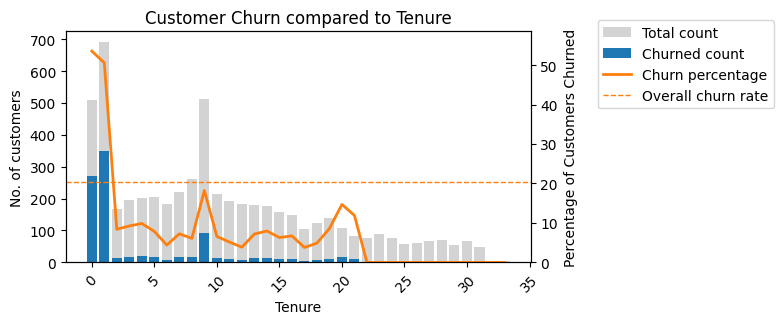

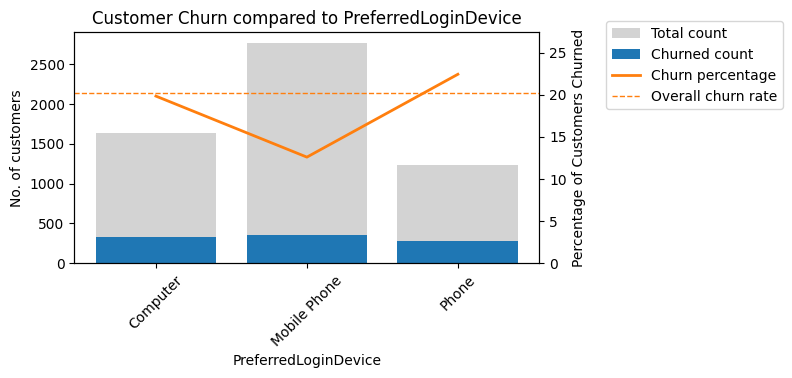

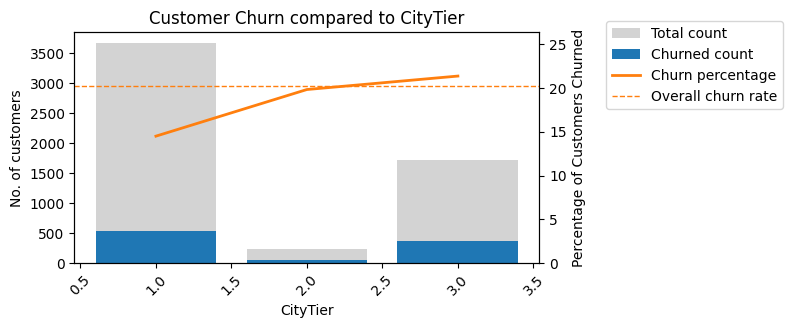

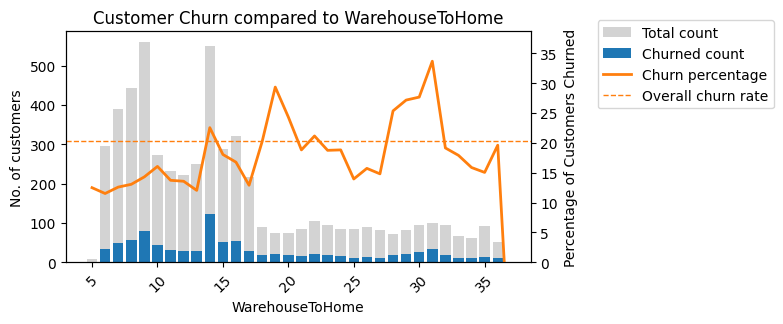

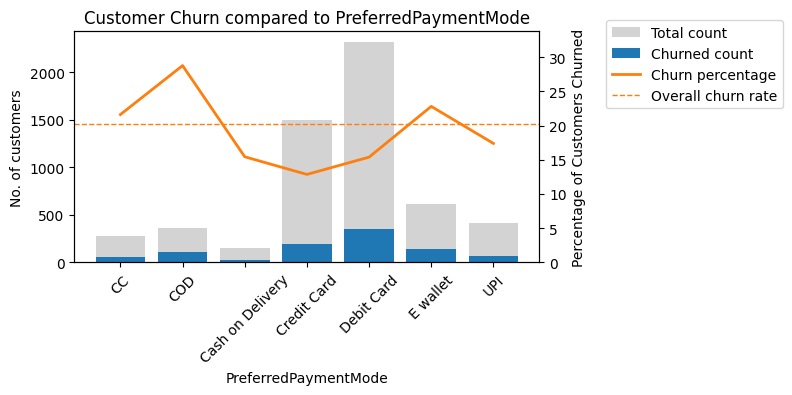

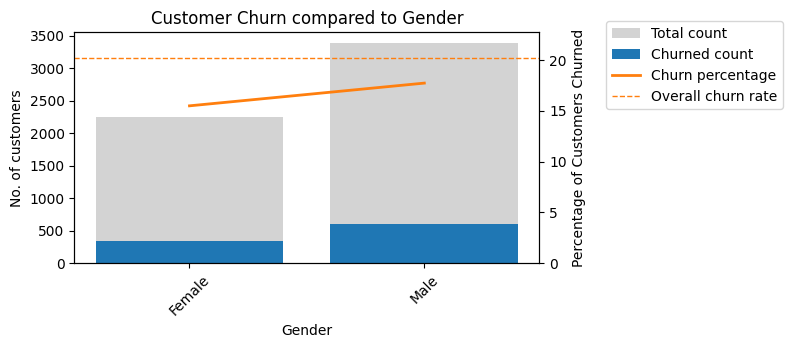

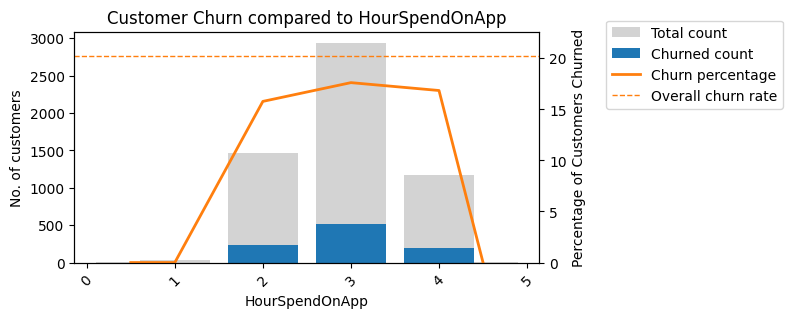

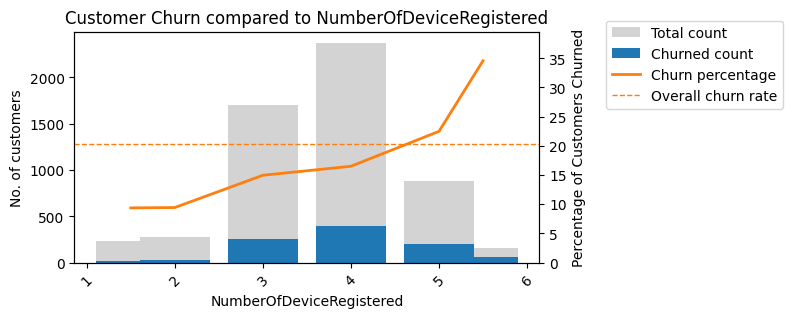

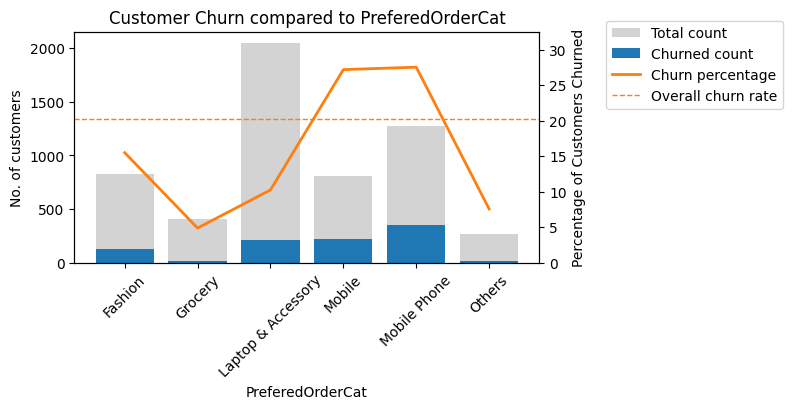

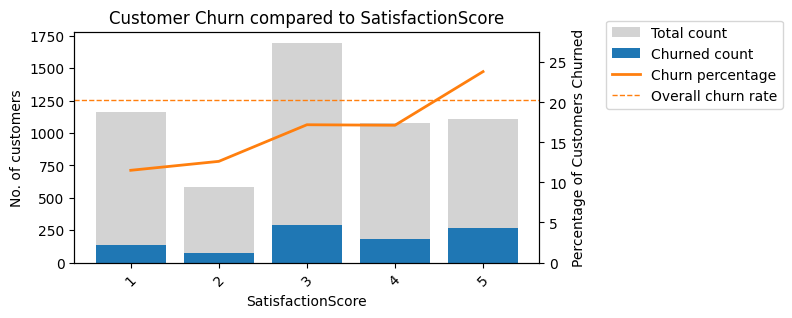

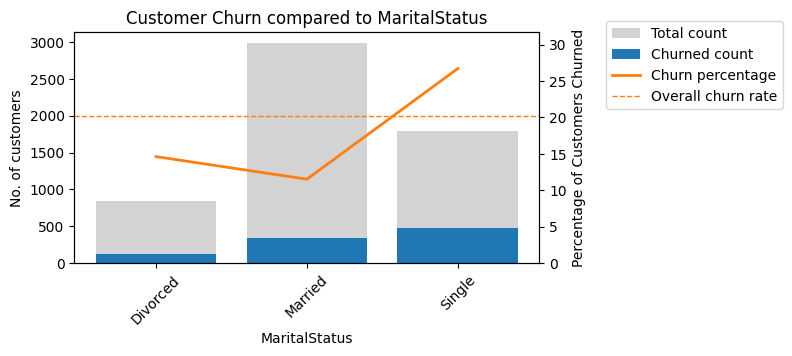

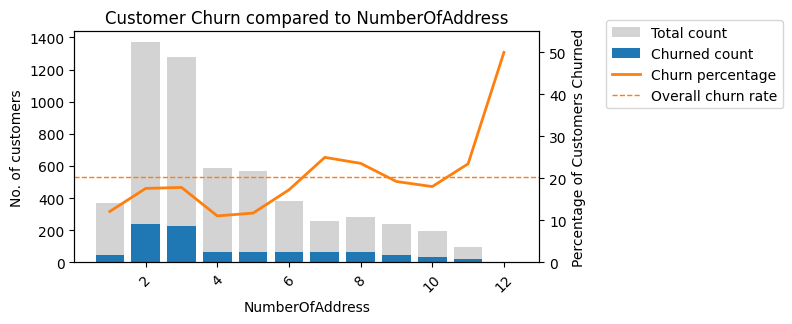

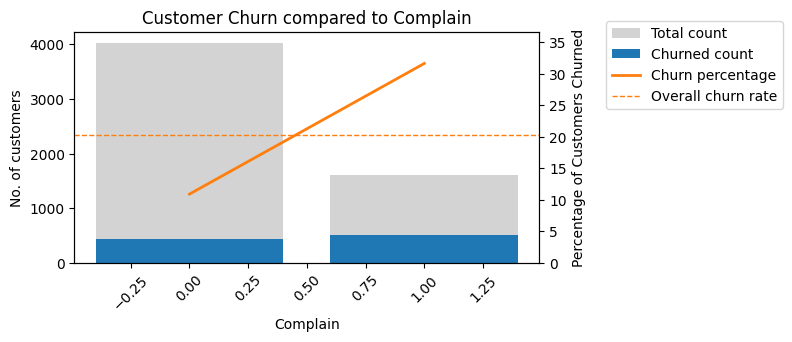

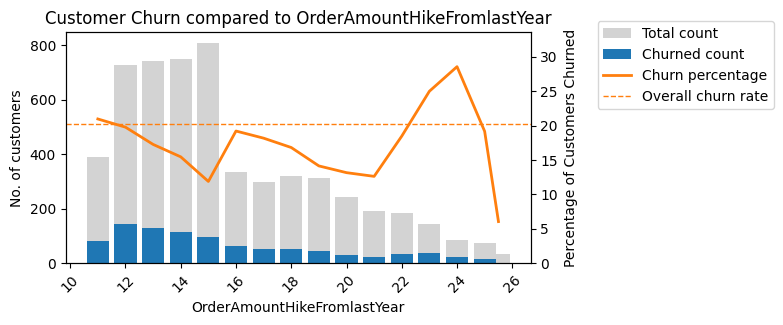

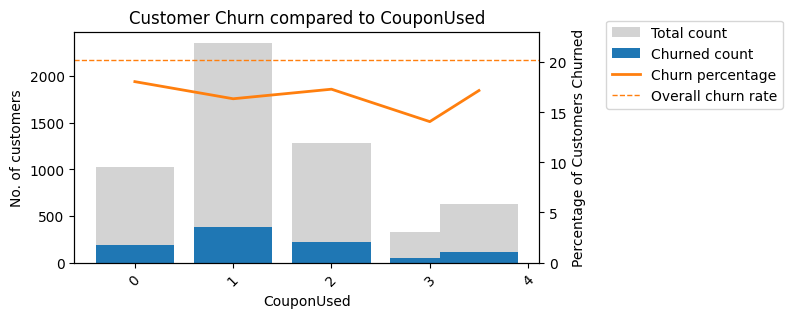

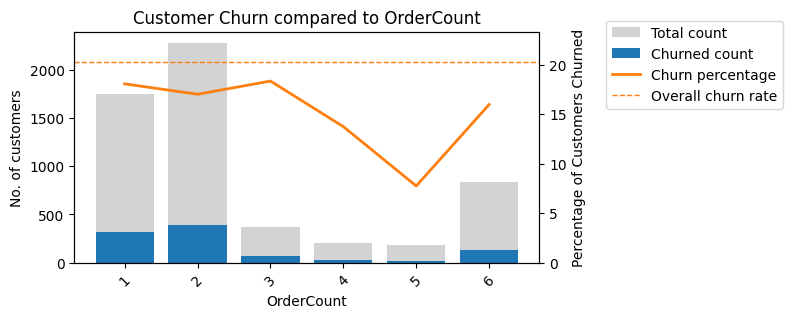

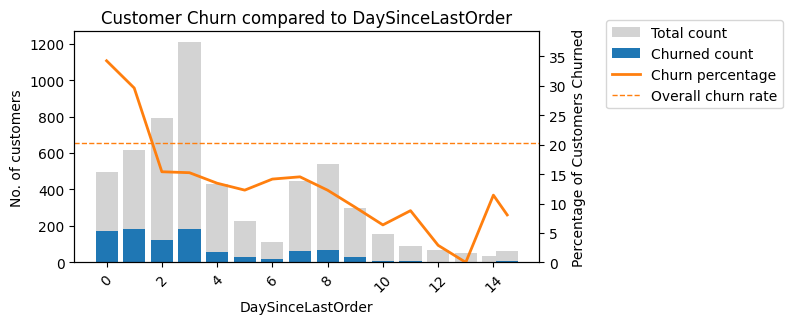

In [28]:
ignore = [ "Churn", "CashbackAmount" ]
for c in df.columns:
    if c not in ignore:
        churn_plot(c, df)


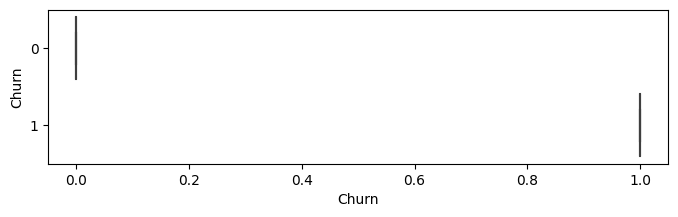

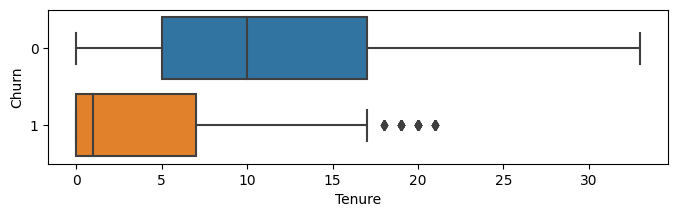

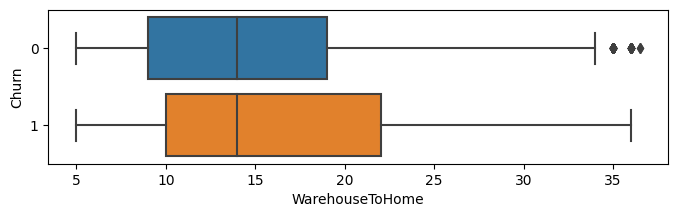

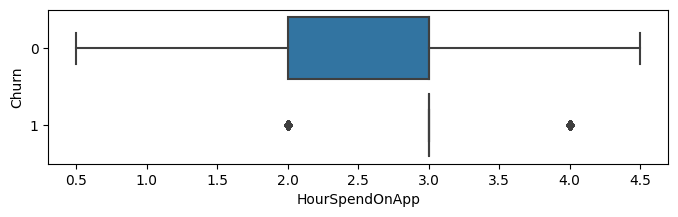

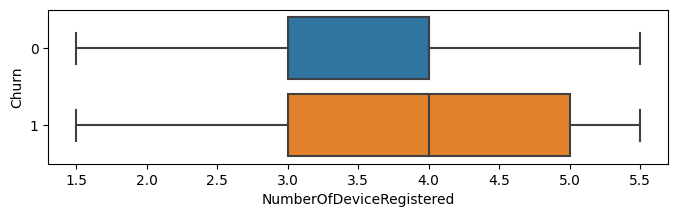

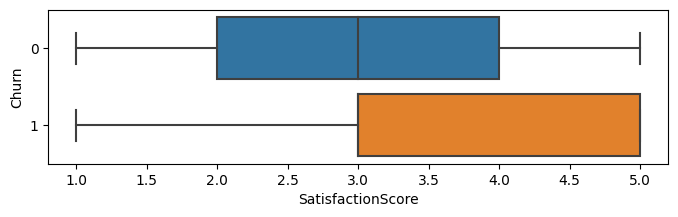

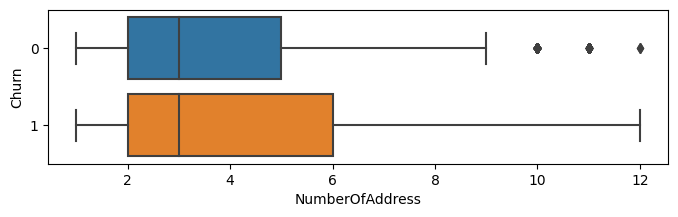

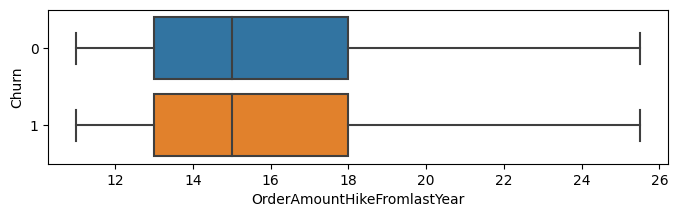

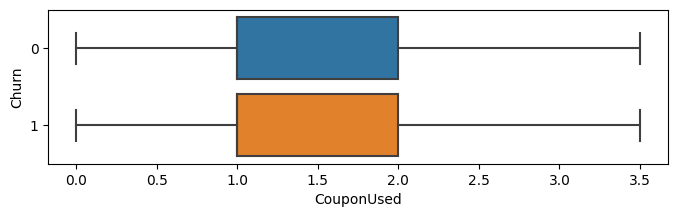

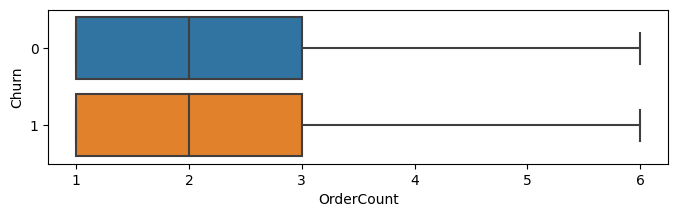

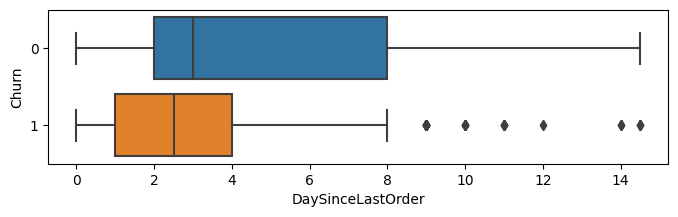

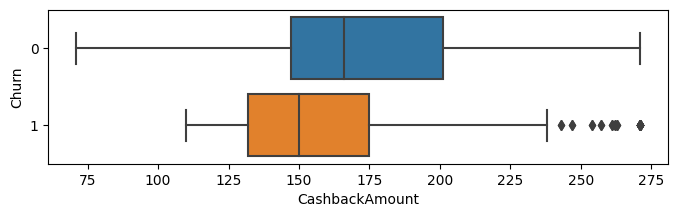

In [29]:
for c in df.columns:
    if df[c].dtype in ("float64", "int64"):
        plt.figure(figsize=(8, 2))
        sns.boxplot(data=df, x=c, y="Churn", orient="h")
        plt.show()

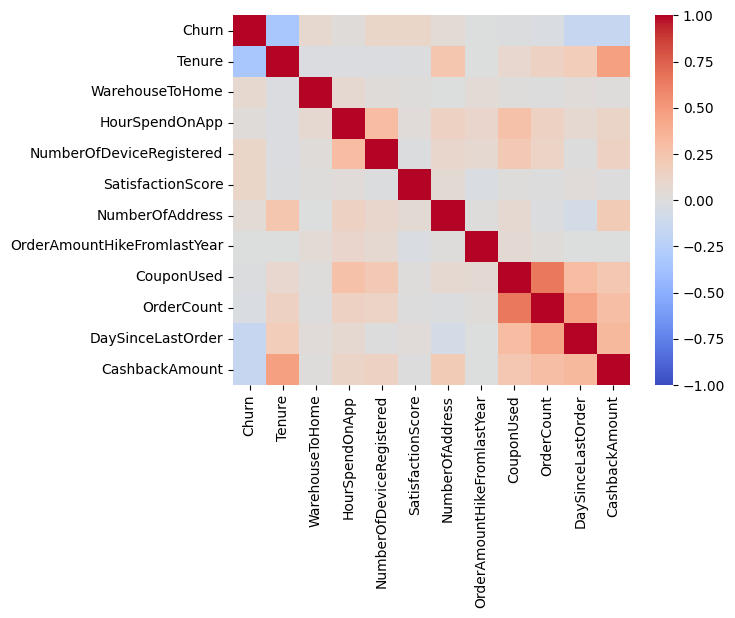

In [30]:
cor = df.corr(numeric_only=True)
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Findings after Analysis

Customers churned more than average with the following attributes:
1. Less than 2 years of tenure
1. Phone and their preferred login device 
1. City Tier 3
1. Distance from warehouse greater than 17 (with a dip in the 23-28 range)
1. A preferred payment method of COD and e-wallet
1. More than 4 devices registered
1. Preferred order category in Mobile or Mobile Phone
1. A satisfaction score of 5.  (Anomaly?  As the score increases, the churn rate increases.)
1. Marital status of Single
1. Greater than 6 number of addresses
1. If the customer has complained
1. The order amount increased by 23 - 25% from last year
1. Less than 2 days since their last order 

Other Insights
- Males churned more than females 

From the boxplots
- The mean of the cashback amount for those that churned is less than the amount for those that didn’t.



## Encoding

In [31]:
df_enc = df.copy()
df_enc.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1,11.0,1.0,1.0,5.0,160.0
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1,15.0,0.0,1.0,0.0,121.0
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1,14.0,0.0,1.0,3.0,120.0
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0,23.0,0.0,1.0,3.0,134.0
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0,11.0,1.0,1.0,3.0,130.0


In [32]:
#df_enc = pd.get_dummies(df_enc, drop_first=True)
df_enc = pd.get_dummies(df)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   WarehouseToHome                        5630 non-null   float64
 3   HourSpendOnApp                         5630 non-null   float64
 4   NumberOfDeviceRegistered               5630 non-null   float64
 5   SatisfactionScore                      5630 non-null   float64
 6   NumberOfAddress                        5630 non-null   float64
 7   OrderAmountHikeFromlastYear            5630 non-null   float64
 8   CouponUsed                             5630 non-null   float64
 9   OrderCount                             5630 non-null   float64
 10  DaySinceLastOrder                      5630 non-null   float64
 11  Cash

/tmp/ipykernel_16589/1432734107.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_enc = pd.get_dummies(df)
/tmp/ipykernel_16589/1432734107.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_enc = pd.get_dummies(df)


In [33]:
df_enc.head(10)

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
0,1,4.0,6.0,3.0,3.0,2.0,9.0,11.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1
1,1,9.0,8.0,3.0,4.0,3.0,7.0,15.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
2,1,9.0,30.0,2.0,4.0,3.0,6.0,14.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
3,1,0.0,15.0,2.0,4.0,5.0,8.0,23.0,0.0,1.0,...,0,1,0,0,0,0,0,1,1,0
4,1,0.0,12.0,3.0,3.0,5.0,3.0,11.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
5,1,0.0,22.0,3.0,5.0,5.0,2.0,22.0,3.5,6.0,...,0,0,0,1,0,0,0,1,0,1
6,1,9.0,11.0,2.0,3.0,2.0,4.0,14.0,0.0,1.0,...,0,1,0,0,0,1,0,0,1,0
7,1,9.0,6.0,3.0,3.0,2.0,3.0,16.0,2.0,2.0,...,0,0,1,0,0,1,0,0,0,1
8,1,13.0,9.0,3.0,4.0,3.0,2.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
9,1,9.0,31.0,2.0,5.0,3.0,2.0,12.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0


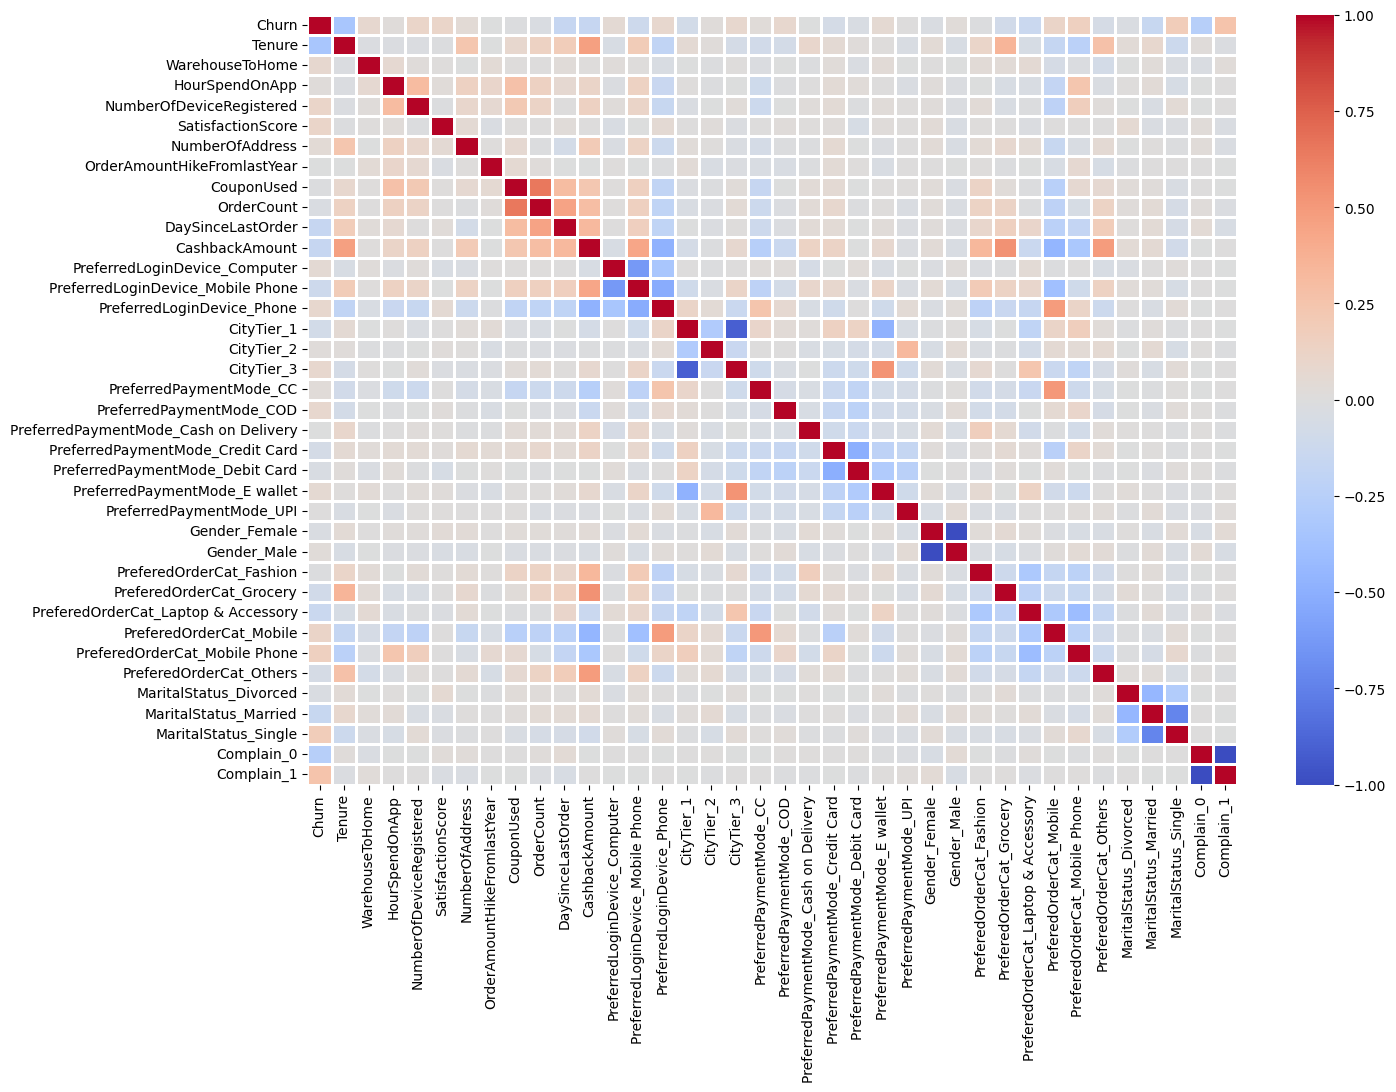

In [34]:
cor = df_enc.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1, linewidth=1)
plt.show()

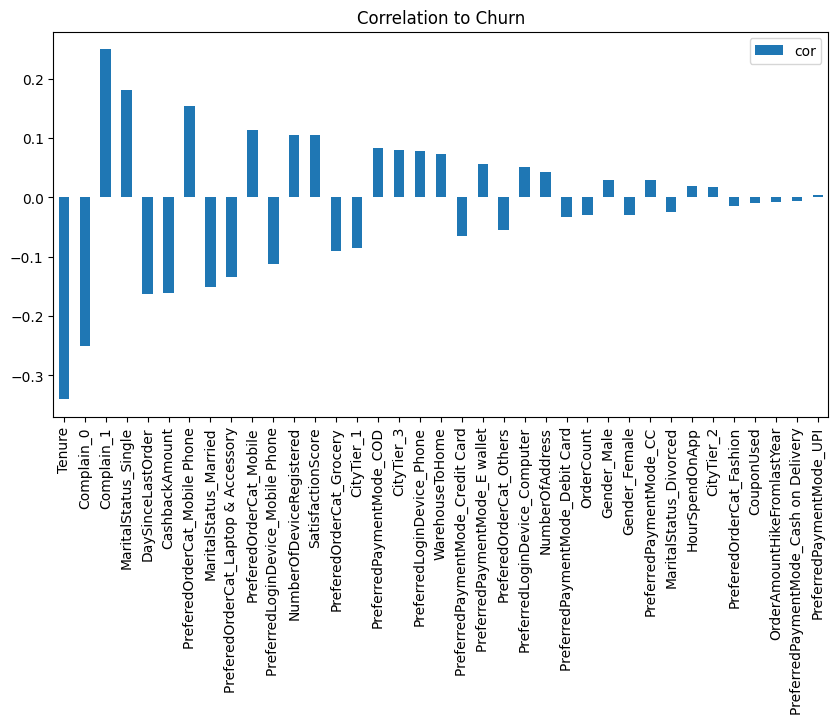

Top 10 Parameters Correlated to Churn
-----------------------------------------------
Tenure                                -0.339678
Complain_0                            -0.250188
Complain_1                             0.250188
MaritalStatus_Single                   0.180847
DaySinceLastOrder                     -0.162501
CashbackAmount                        -0.160295
PreferedOrderCat_Mobile Phone          0.154387
MaritalStatus_Married                 -0.151024
PreferedOrderCat_Laptop & Accessory   -0.133353
PreferedOrderCat_Mobile                0.113364
Name: cor, dtype: float64


In [35]:
c2 = pd.DataFrame({
    "cor": cor['Churn'],
    "abs_cor": abs(cor['Churn'])
})
c2.sort_values(by="abs_cor", ascending=False, inplace=True)
c2[1:].plot.bar(y="cor", figsize=(10,5))
plt.title("Correlation to Churn")
plt.show()
print("Top 10 Parameters Correlated to Churn")
print("-----------------------------------------------")
print(c2.iloc[1:11, 0])

### t-SNE

In [36]:
%%time
from sklearn.manifold import TSNE

df_tsne = df_enc.drop("Churn", axis=1)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = TSNE()
tsne_results = tsne.fit_transform(df_tsne)
df_tsne_results = pd.DataFrame(tsne_results)
df_tsne_results["Churn"] = df["Churn"]
print("-----------------------")

-----------------------
CPU times: user 4min 25s, sys: 29.9 s, total: 4min 55s
Wall time: 52.4 s


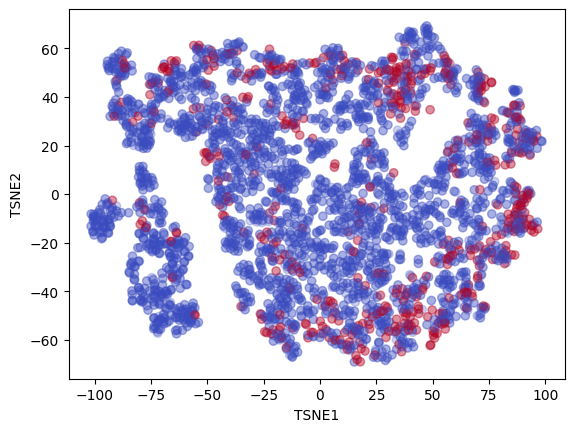

In [37]:
plt.scatter(df_tsne_results[0], df_tsne_results[1], c=df_tsne_results["Churn"], cmap="coolwarm", alpha=0.25)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

## Model Creation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [39]:
def plot_confusion_matrix(mtx, title=""):
    group_names = [ 'True Neg', 'False Pos', 'False Neg', 'True Pos' ]
    group_counts = [ "{0:0.0f}".format(v) for v in mtx.flatten() ]
    group_percentages = [ "{0:.2%}".format(v) for v in mtx.flatten()/np.sum(mtx) ]
    labels = [ f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages) ]

    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mtx, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


In [40]:
def plot_roc(X, y, m, title=""):
    
    probs = m.predict_proba(X)[:, 1]

    auc = metrics.roc_auc_score(y, probs)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y, probs)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(test_fpr, test_tpr)
    plt.text(0.72, 0.05, f"AUC: {auc:.3f}", fontsize=16)
    plt.title(title)
    plt.show()
    
    return auc


In [41]:
def print_model_summary(model, X, y, name):
    y_pred = model.predict(X_test)

    acc  = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec  = metrics.recall_score(y_test, y_pred)
    f1   = metrics.f1_score(y_test, y_pred)
    
    probs = model.predict_proba(X)[:, 1]
    auc = metrics.roc_auc_score(y, probs)
    
    print("---------------------------------------------------------")
    print("                  PERFORMANCE SUMMARY")
    print("---------------------------------------------------------")
    print()
    print(f"Model: {name}")
    print()
    print(f" Accuracy: {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"   Recall: {rec:.2%}")
    print(f" F1 Score: {f1:.2%}")
    print(f"      AUC: {auc:.2%}")
    print()
    print(metrics.classification_report(y_test, y_pred))
    
    conf_mat = metrics.confusion_matrix(y_pred, y_test)
    plot_confusion_matrix(conf_mat, f"{name} Confusion Matrix")
    
    plot_roc(X_test, y_test, model, f"{name} ROC Curve")
    
    return [ acc, prec, rec, f1, auc ]
    

### Split train and test data

In [42]:
X = df_enc.drop("Churn", axis=1)
y = df_enc['Churn']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4222, 37)
Shape of X_test: (1408, 37)


### PCA

In [45]:
%%time

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = PCA()
data_pca = pca.fit_transform(X)
data_pca = pd.DataFrame(data_pca)
print("-----------------------")

-----------------------
CPU times: user 6.28 s, sys: 6.86 s, total: 13.1 s
Wall time: 1.84 s


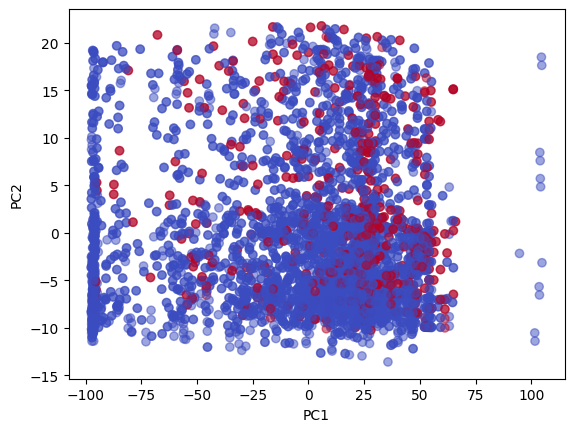

In [46]:
plt.scatter(data_pca[0], data_pca[1], c=df_enc["Churn"], alpha=0.5, cmap="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Logistic Regression

In [47]:
summary = { }

In [48]:
model_lr = LogisticRegression()
#model_lr = LogisticRegression(max_iter=1000)
#model_lr = LogisticRegression(solver="sag", max_iter=1000)
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

/home/cbowers/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8778409090909091

---------------------------------------------------------
                  PERFORMANCE SUMMARY
---------------------------------------------------------

Model: Logistic Regression

 Accuracy: 87.78%
Precision: 71.03%
   Recall: 44.21%
 F1 Score: 54.50%
      AUC: 84.81%

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1175
           1       0.71      0.44      0.54       233

    accuracy                           0.88      1408
   macro avg       0.80      0.70      0.74      1408
weighted avg       0.87      0.88      0.87      1408



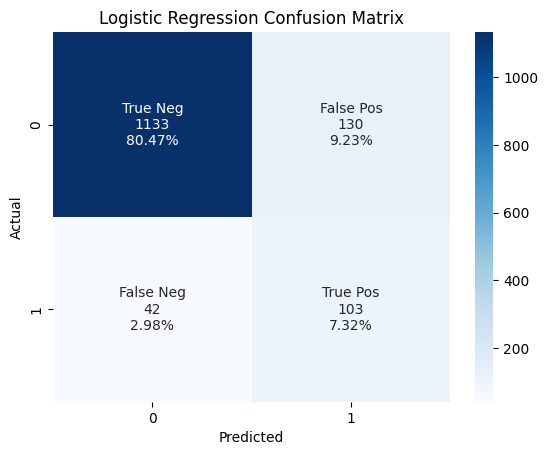

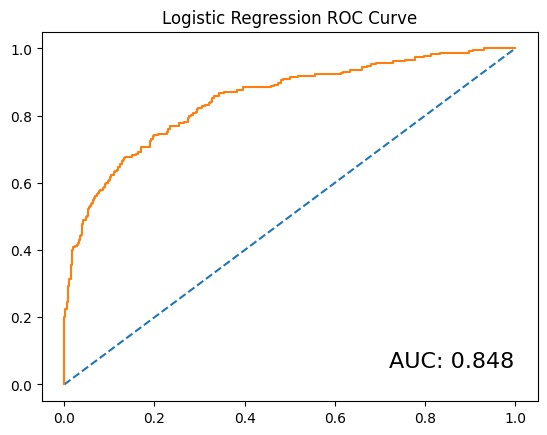

In [49]:
summary["logit"] = print_model_summary(model_lr, X_test, y_test, "Logistic Regression")

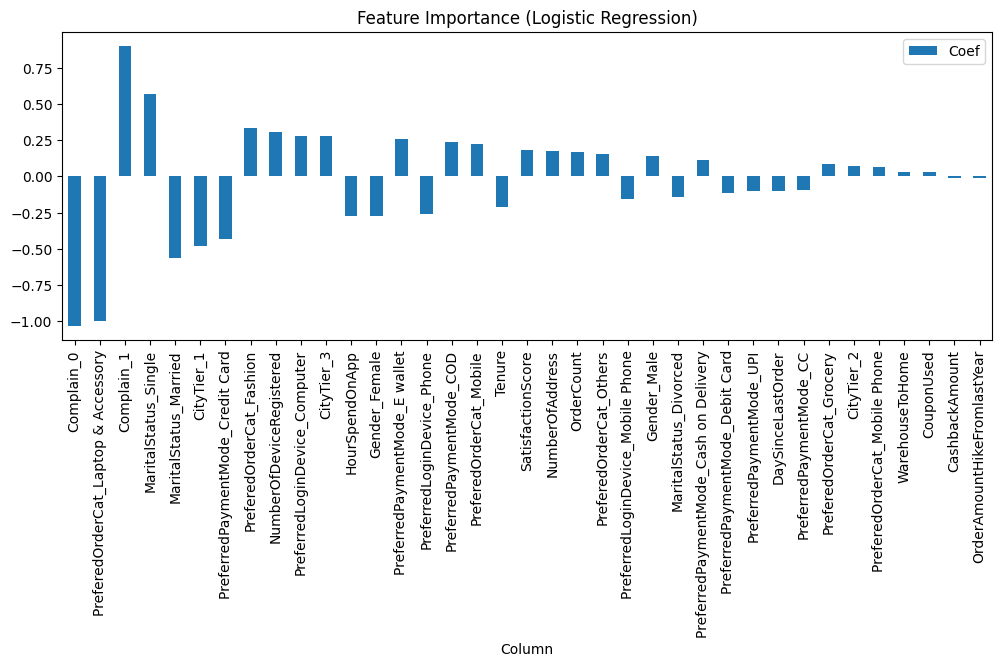

In [50]:
df_coef_lr = pd.DataFrame({
    "Column": X_train.columns,
    "Coef": model_lr.coef_[0],
    "AbsCoef": abs(model_lr.coef_[0]),
})
df_coef_lr.sort_values(by='AbsCoef', ascending=False, inplace=True)
df_coef_lr.plot.bar(x="Column", y="Coef", figsize=(12,4))
plt.title("Feature Importance (Logistic Regression)")
plt.show()

### Decision Tree Classifier

In [51]:
model_dt = DecisionTreeClassifier(random_state=0)
model_dt = model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.953125

---------------------------------------------------------
                  PERFORMANCE SUMMARY
---------------------------------------------------------

Model: Decision Tree

 Accuracy: 95.31%
Precision: 85.53%
   Recall: 86.27%
 F1 Score: 85.90%
      AUC: 91.69%

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1175
           1       0.86      0.86      0.86       233

    accuracy                           0.95      1408
   macro avg       0.91      0.92      0.92      1408
weighted avg       0.95      0.95      0.95      1408



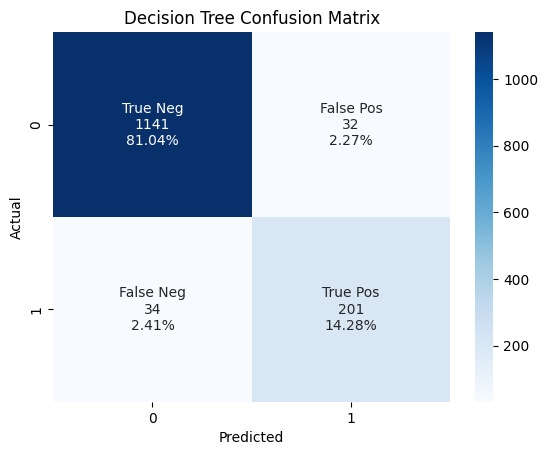

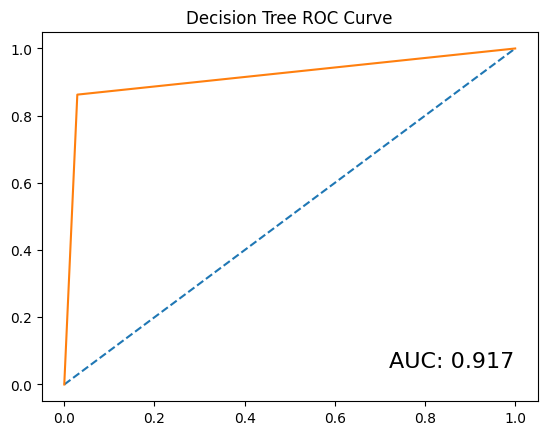

In [52]:
summary["dtree"] = print_model_summary(model_dt, X_test, y_test, "Decision Tree")

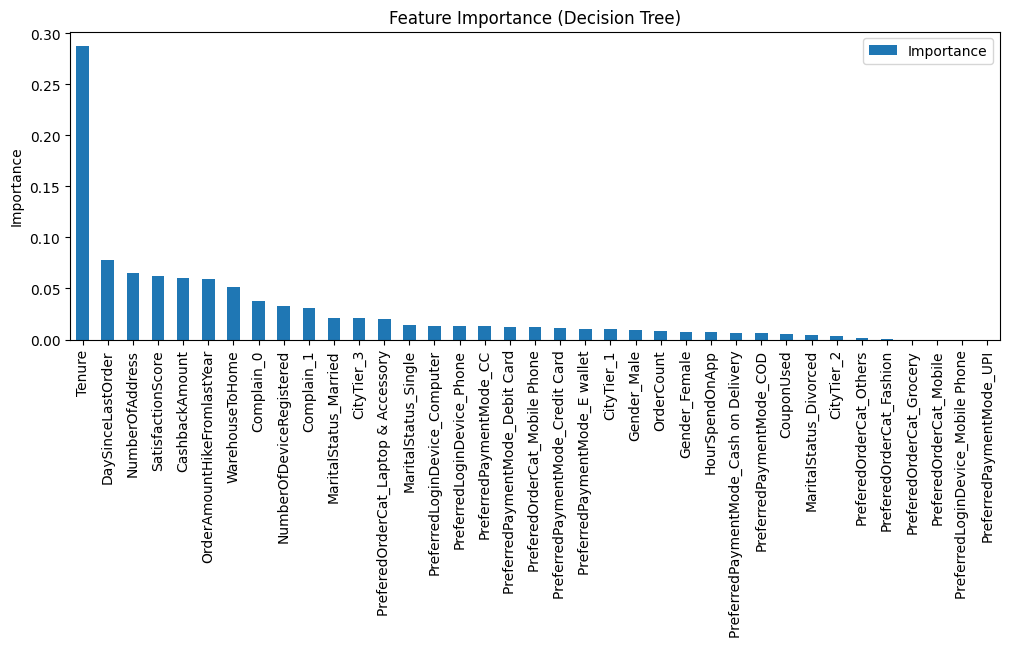

In [53]:
imp_df = pd.DataFrame(
    model_dt.feature_importances_, 
    index = X_train.columns, 
    columns = ["Importance"]
)
imp_df.sort_values(by='Importance', ascending=False, inplace=True)
imp_df.plot(kind='bar', figsize=(12, 4))
#imp_df["Importance"].cumsum().plot(c="orangered", label="Cumulative Importance")
plt.xticks(rotation="vertical")
plt.ylabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.show()

### Random Forest Classifier

In [54]:
#model_rf = RandomForestClassifier(n_estimators=500, random_state=0)
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.9552556818181818

---------------------------------------------------------
                  PERFORMANCE SUMMARY
---------------------------------------------------------

Model: Random Forest

 Accuracy: 95.53%
Precision: 95.21%
   Recall: 76.82%
 F1 Score: 85.04%
      AUC: 97.05%

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1175
           1       0.95      0.77      0.85       233

    accuracy                           0.96      1408
   macro avg       0.95      0.88      0.91      1408
weighted avg       0.96      0.96      0.95      1408



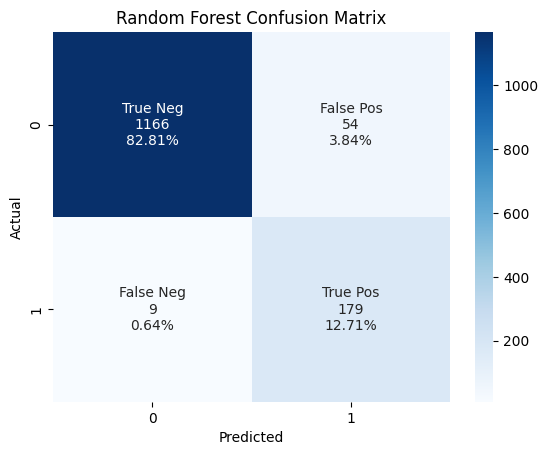

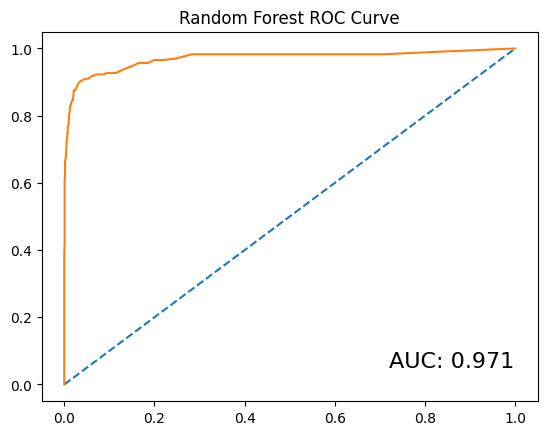

In [55]:
summary["forest"] = print_model_summary(model_rf, X_test, y_test, "Random Forest")

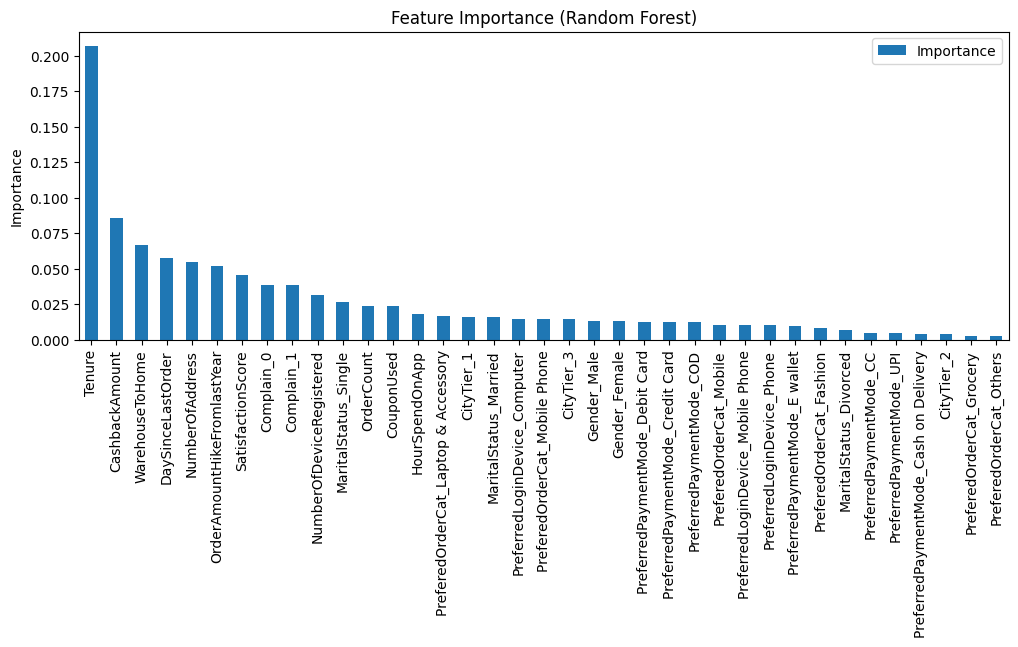

In [56]:
imp_df = pd.DataFrame(
    model_rf.feature_importances_, 
    index = X_train.columns, 
    columns = ["Importance"]
)
imp_df.sort_values(by='Importance', ascending=False, inplace=True)
imp_df.plot(kind='bar', figsize=(12, 4))
#imp_df["Importance"].cumsum().plot(c="orangered", label="Cumulative Importance")
plt.xticks(rotation="vertical")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

## KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

0.8892045454545454

---------------------------------------------------------
                  PERFORMANCE SUMMARY
---------------------------------------------------------

Model: KNN

 Accuracy: 88.92%
Precision: 88.12%
   Recall: 38.20%
 F1 Score: 53.29%
      AUC: 88.61%

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1175
           1       0.88      0.38      0.53       233

    accuracy                           0.89      1408
   macro avg       0.89      0.69      0.74      1408
weighted avg       0.89      0.89      0.87      1408



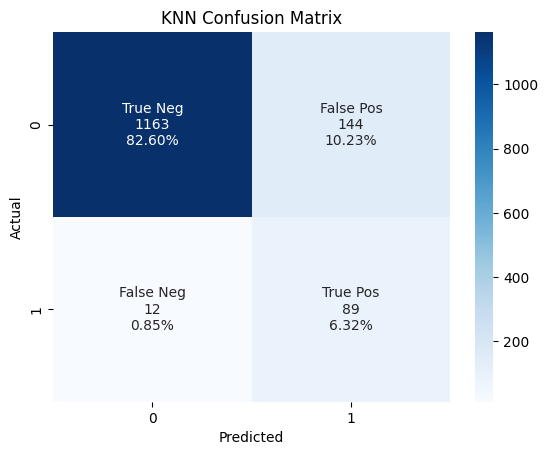

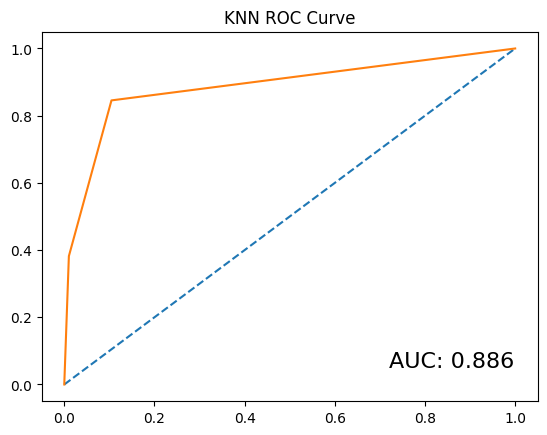

In [58]:
summary["knn"] = print_model_summary(model_kn, X_test, y_test, "KNN")

### Model Training Summary 

In [59]:
print("         SUMMARY OF MODEL PERFORMANCE     ")
print("----------------------------------------------")
print("Name\tAcc\tPrec\tRecl\tF1\tAUC")
print("----------------------------------------------")
for k, v in summary.items():
    print(f"{k}\t{v[0]:.3f}\t{v[1]:.3f}\t{v[2]:.3f}\t{v[3]:.3f}\t{v[4]:.3f}")
print("----------------------------------------------")

         SUMMARY OF MODEL PERFORMANCE     
----------------------------------------------
Name	Acc	Prec	Recl	F1	AUC
----------------------------------------------
logit	0.878	0.710	0.442	0.545	0.848
dtree	0.953	0.855	0.863	0.859	0.917
forest	0.955	0.952	0.768	0.850	0.971
knn	0.889	0.881	0.382	0.533	0.886
----------------------------------------------


Comments:
- Random Forest has the highest accuracy, followed very closely by Decision Tree
- Between those two, there is a big difference between Precision and Recall
- We should favour precision since, in the case of identifing customers with a high probability of churning, we would rather flag them incorrectly and waste the extra retention efforts than to not flag them and lose them as a customer.
  - This is assuming the retention efforts (by Marketing, Sales, etc.) are less costly than the impact of losing a customer.

### Hyperparameter Tuning

In [60]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [61]:
%%time
from sklearn.model_selection import GridSearchCV

params = {
    #'criterion': [ "gini", "entropy" ],
    'n_estimators': [ 1000 ],
    'max_depth': [ 3, 6, 9, 12, 15 ],
    'min_samples_split': [ 2, 4, 8 ],
    #'min_samples_leaf': [ 2, 4 ],
    #'max_features': [ "sqrt", "log2", None ],
    #'max_leaf_nodes': [3, 6, 9],
}

scoring_method = "accuracy"

model = RandomForestClassifier(random_state=0)

gscv = GridSearchCV(
    model,
    params,
    #cv = 5,
    scoring = scoring_method,
    verbose = 1,
    n_jobs = -1  # use all CPU's
)

gscv.fit(X_train, y_train)
print("-----")
print(f'Best parameters {gscv.best_params_}')
print(
    f'Mean cross-validated {scoring_method} of the best_estimator: ' + 
    f'{gscv.best_score_:.3f}'
)
print("-----")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
-----
Best parameters {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 1000}
Mean cross-validated accuracy of the best_estimator: 0.953
-----
CPU times: user 5.73 s, sys: 0 ns, total: 5.73 s
Wall time: 1min 37s


---------------------------------------------------------
                  PERFORMANCE SUMMARY
---------------------------------------------------------

Model: gscv

 Accuracy: 95.53%
Precision: 94.27%
   Recall: 77.68%
 F1 Score: 85.18%
      AUC: 97.44%

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1175
           1       0.94      0.78      0.85       233

    accuracy                           0.96      1408
   macro avg       0.95      0.88      0.91      1408
weighted avg       0.95      0.96      0.95      1408



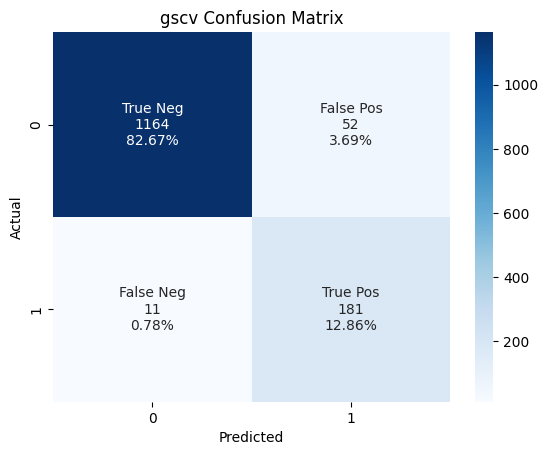

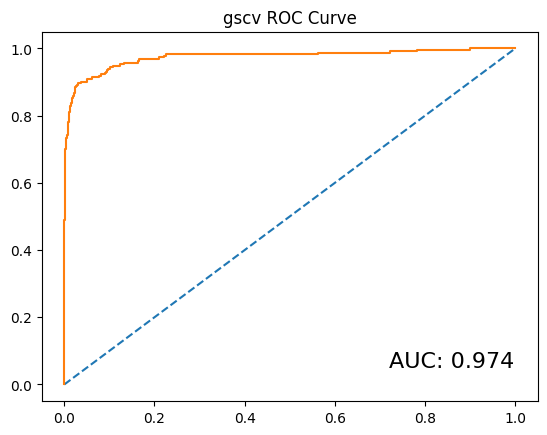

In [62]:
summary["gscv"] = print_model_summary(gscv, X_test, y_test, "gscv")

In [63]:
before = summary['forest']
after = summary['gscv']
diff = [a - b for a, b in zip(after, before)]

print("      RESULTS OF HYPERPARAMETER TUNING")
print()
for k, v in gscv.best_params_.items():
    print(f"{k}: {v}")
print()
print("----------------------------------------------")
print("Name\t Acc\t Prec\t Recl\t F1\t AUC")
print("----------------------------------------------")

labels = [ "Before", "After", "Diff" ]
for lbl, v in zip(labels, [ before, after, diff ]):
    val_str = ""
    for val in v:
        val_str += f"{val:>6.3f}\t"
    print(f"{lbl}\t{val_str}")
print("----------------------------------------------")

      RESULTS OF HYPERPARAMETER TUNING

max_depth: 15
min_samples_split: 2
n_estimators: 1000

----------------------------------------------
Name	 Acc	 Prec	 Recl	 F1	 AUC
----------------------------------------------
Before	 0.955	 0.952	 0.768	 0.850	 0.971	
After	 0.955	 0.943	 0.777	 0.852	 0.974	
Diff	 0.000	-0.009	 0.009	 0.001	 0.004	
----------------------------------------------


### Findings after Hyperparameter Tuning
- Very little improvement after hyperparamter tuning. 
- This is typical of a random forest if the number of trees is high (in this case 1000) since the randomization tends to find a sufficient model.
- Regarding the accuracy, these results show the default paramaters yielded the best model.
- There was a drop in precision and an increase in recall.  In our business case of customer churn, we should favour a model with a higher precision.
- Any future effort on improving this model should be focsed on feature enhancements and selection.


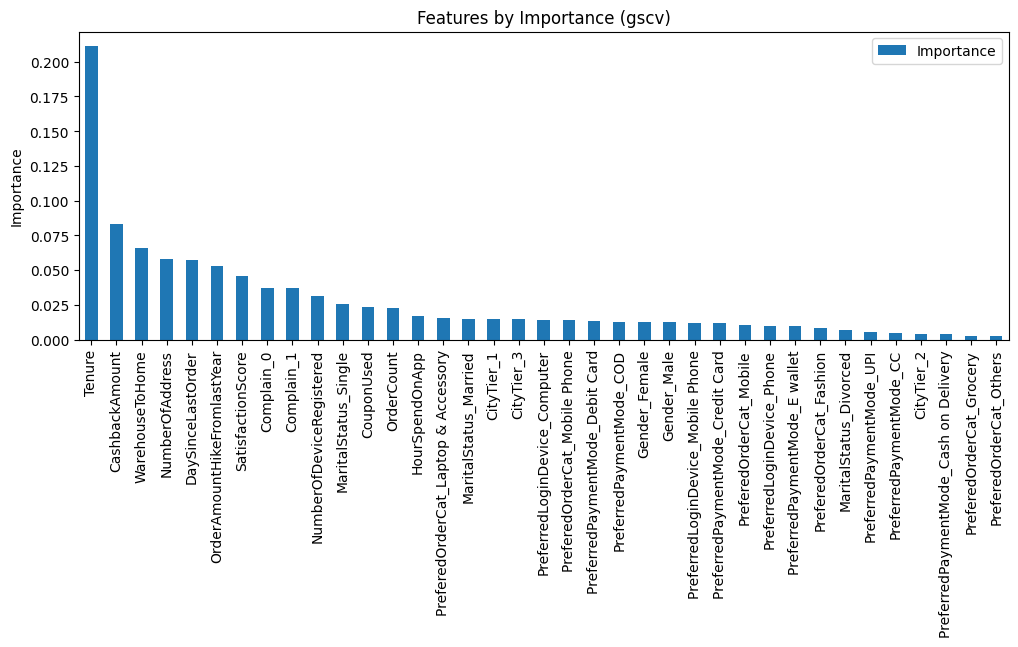

In [64]:
imp_df = pd.DataFrame(
    gscv.best_estimator_.feature_importances_, 
    index = X_train.columns, 
    columns = ["Importance"]
)
imp_df.sort_values(by='Importance', ascending=False, inplace=True)
imp_df.plot(kind='bar', figsize=(12, 4))
#imp_df["Importance"].cumsum().plot(c="orangered", label="Cumulative Importance")
plt.xticks(rotation="vertical")
plt.ylabel("Importance")
plt.title("Features by Importance (gscv)")
plt.show()